In [1]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Function to load the model and print its summary
def load_model(model_path):
    model = keras.models.load_model(model_path)
    #model.summary()
    return model


# Function to get image array
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0  # Normalize the image to [0, 1] range
    return array



In [2]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

# Hide the main Tkinter window
Tk().withdraw()
# Print the selected folder
print(f"Please select the folder from the pop up, it will be visible after you minimize this window:")
# Ask the user to select the folder with custom text
home_folder = askdirectory(title="Select the Project_submission folder")

# Check if a folder was selected
if not home_folder:
    print("No folder selected. Exiting.")
    exit()

# Print the selected folder or use it in your script
print(f"Selected folder: {home_folder}")


Please select the folder from the pop up, it will be visible after you minimize this window:
Selected folder: D:/Others/Project_Submission_ALL_DATA


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

def compute_saliency(model, img_array, class_index):
    img_array = tf.convert_to_tensor(img_array)
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        preds = model(img_array)
        loss = preds[0, class_index]
    grads = tape.gradient(loss, img_array)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    return saliency.numpy()

def overlay_saliency_on_image(img_array, saliency_map, color_map=cv2.COLORMAP_OCEAN):
    # Normalize the saliency map to [0, 1]
    saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))

    # Convert the saliency map to a heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * saliency_map), color_map)

    # Convert image array from RGB to BGR (OpenCV uses BGR by default)
    img_bgr = cv2.cvtColor(np.uint8(img_array * 255), cv2.COLOR_RGB2BGR)

    # Adjust the weights in addWeighted to make the overlay clearer
    overlayed_img = cv2.addWeighted(img_bgr, 0.3, heatmap, 1.8, 0)

    return overlayed_img








In [4]:
import os

1/1 [==============================] - 1s 1s/step
Predicted class index for D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 1 ( 1 to 5 years)/IMG_0016.PNG: 0
1/1 [==============================] - 0s 85ms/step
Predicted class index for D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 1 ( 1 to 5 years)/IMG_5023 (2).PNG: 2
1/1 [==============================] - 0s 61ms/step
Predicted class index for D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 2 ( 5.1 to 9 years)/IMG_0231.PNG: 1
1/1 [==============================] - 0s 88ms/step
Predicted class index for D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 2 ( 5.1 to 9 years)/IMG_6588.PNG: 2
1/1 [==============================] - 0s 98ms/step
Predicted class index for D:/Other

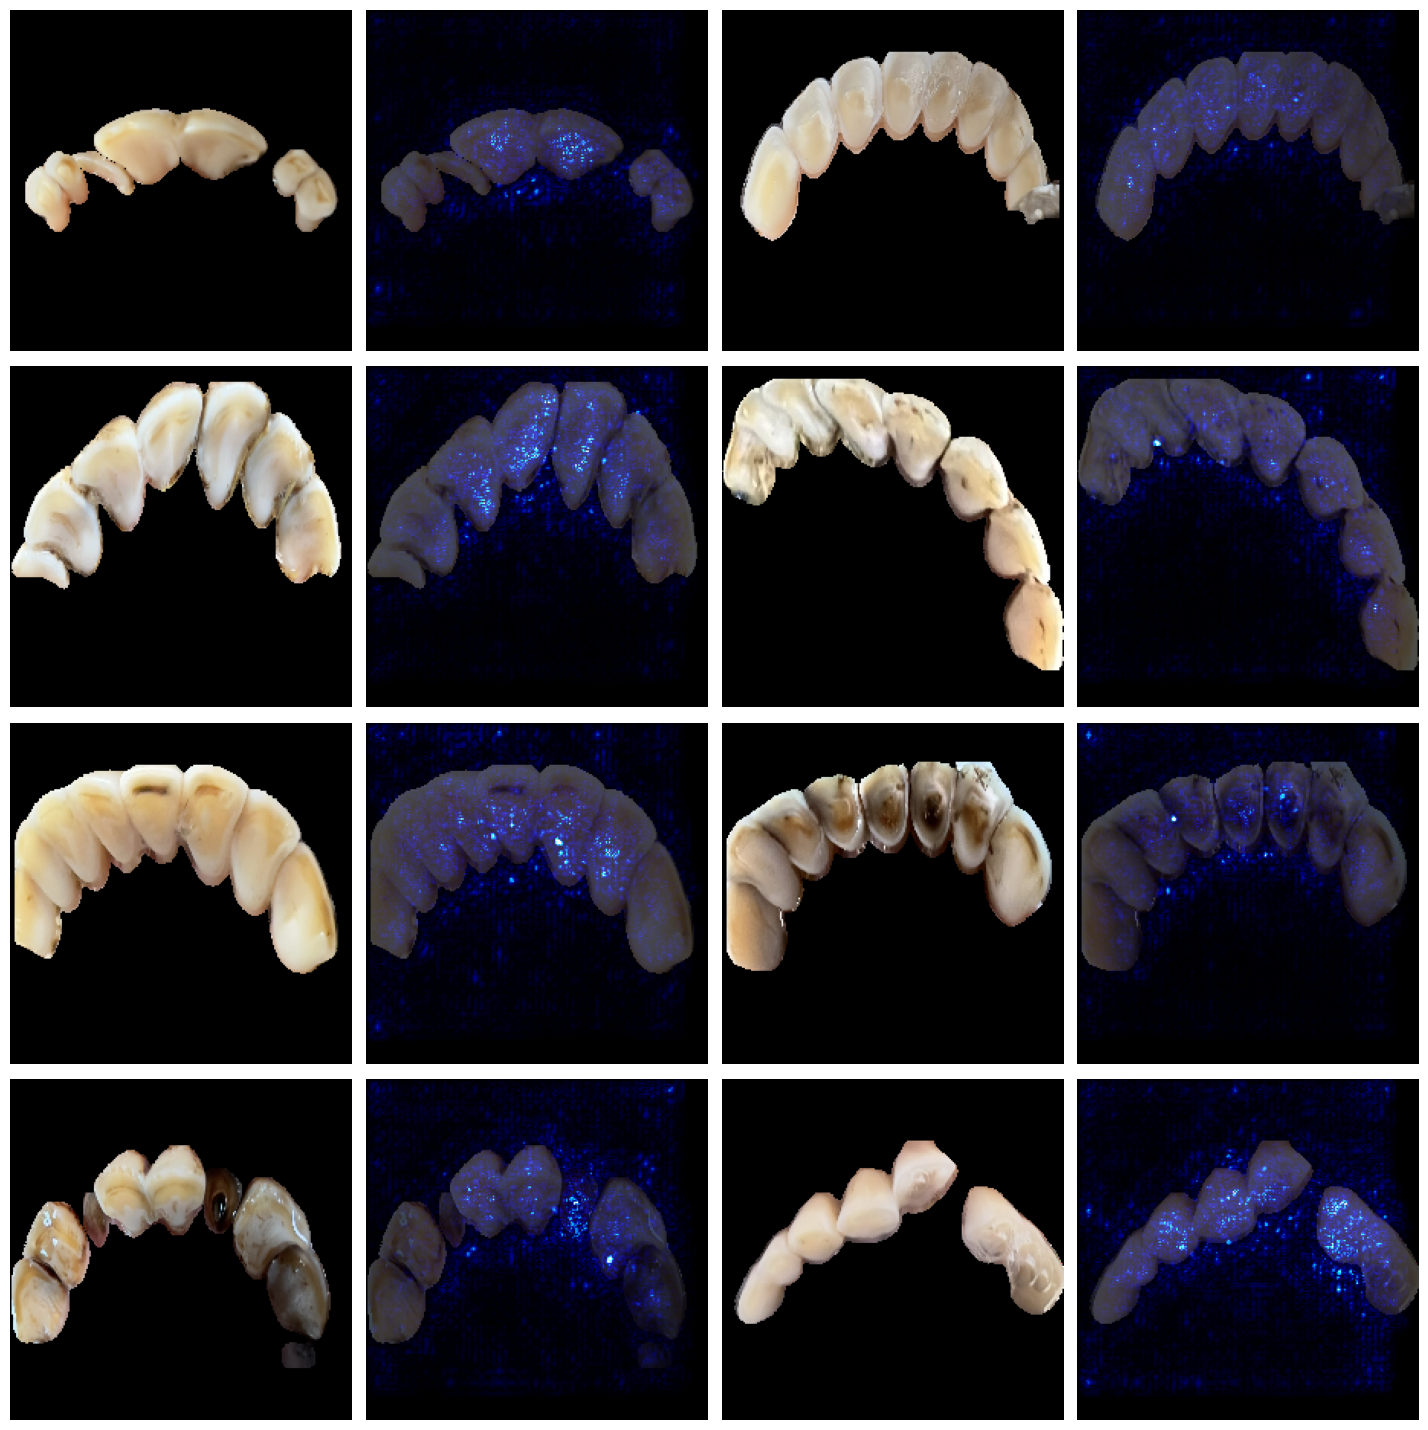

In [5]:
def perform_gradcam(model_path, right_img_paths, wrong_img_paths, last_conv_layer_name, column_names, img_size=(224, 224)):
    model = load_model(model_path)
    num_images = len(right_img_paths)

    fig, axes = plt.subplots(num_images, 4, figsize=(16, 4 * num_images))
    #fig.suptitle('Grad-CAM and Saliency Map Visualization', fontsize=16)

    for i, (right_img_path, wrong_img_path) in enumerate(zip(right_img_paths, wrong_img_paths)):
        # Process right image
        right_img_array = get_img_array(right_img_path, size=img_size)
        right_preds = model.predict(right_img_array)
        right_pred_index = np.argmax(right_preds[0])
        print(f"Predicted class index for {right_img_path}: {right_pred_index}")

        right_saliency_map = compute_saliency(model, right_img_array, right_pred_index)
        right_overlayed_img = overlay_saliency_on_image(right_img_array[0], right_saliency_map)

        axes[i, 0].imshow(tf.keras.preprocessing.image.load_img(right_img_path, target_size=img_size))
        axes[i, 0].axis('off')

        axes[i, 1].imshow(cv2.cvtColor(right_overlayed_img, cv2.COLOR_BGR2RGB))
        axes[i, 1].axis('off')

        # Process wrong image
        wrong_img_array = get_img_array(wrong_img_path, size=img_size)
        wrong_preds = model.predict(wrong_img_array)
        wrong_pred_index = np.argmax(wrong_preds[0])
        print(f"Predicted class index for {wrong_img_path}: {wrong_pred_index}")

        wrong_saliency_map = compute_saliency(model, wrong_img_array, wrong_pred_index)
        wrong_overlayed_img = overlay_saliency_on_image(wrong_img_array[0], wrong_saliency_map)

        axes[i, 3].imshow(cv2.cvtColor(wrong_overlayed_img, cv2.COLOR_BGR2RGB))
        axes[i, 3].axis('off')

        axes[i, 2].imshow(tf.keras.preprocessing.image.load_img(wrong_img_path, target_size=img_size))
        axes[i, 2].axis('off')

        # Adding row labels
        axes[i, 0].set_ylabel(column_names[i], rotation=0, labelpad=50, fontsize=14, va='center', ha='right')


    plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
    # uncomment to save
    #output_image_path = os.path.join(home_folder, "RESULTS/RESULT_IMAGES")
    #plt.savefig(os.path.join(output_image_path,'output_image.png'), dpi=400, bbox_inches='tight', pad_inches=0)
    
    plt.show()

# Example usage
right_img_paths = [os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 1 ( 1 to 5 years)/IMG_0016.PNG"),
             os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 2 ( 5.1 to 9 years)/IMG_0231.PNG"),
             os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 3 ( 9.1 to 13 years)/IMG_0005.PNG"),
             os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 4 ( 13.1 and above)/IMG_8588.PNG")]

wrong_img_paths = [os.path.join(home_folder,'Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 1 ( 1 to 5 years)/IMG_5023 (2).PNG'),
                   os.path.join(home_folder,'Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 2 ( 5.1 to 9 years)/IMG_6588.PNG'),
                   os.path.join(home_folder,'Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 3 ( 9.1 to 13 years)/IMG_6798.PNG'),
                   os.path.join(home_folder,'Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test/Group 4 ( 13.1 and above)/IMG_10036.PNG')]
column_names = ['g 4,1', 'g 4,2', 'g 4,3', 'g 4,4']
perform_gradcam(os.path.join(home_folder,"RESULTS/MODEL_FILES/Model_Files_4_Classes/model3.h5"), right_img_paths, wrong_img_paths, 'mixed10', column_names)
